# Surya G - 20BCE0079

Vellore Campus

E-mail ID: surya.g2020@vitstudent.ac.in

Task 1: Read the dataset and do data pre-processing


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().any()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [6]:
print(df.Age.unique())
print(df.Sex.unique())
print(df.BP.unique())
print(df.Cholesterol.unique())
print(df.Na_to_K.unique())
print(df.Drug.unique())

[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.294  8.968 11.953 20.013  9.677 

In [9]:
df.Age.value_counts()
df.Sex.value_counts()
df.BP.value_counts()
df.Cholesterol.value_counts()
df.Na_to_K.value_counts()
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
df.corr()

### Visualization

In [14]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


<ipython-input-13-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

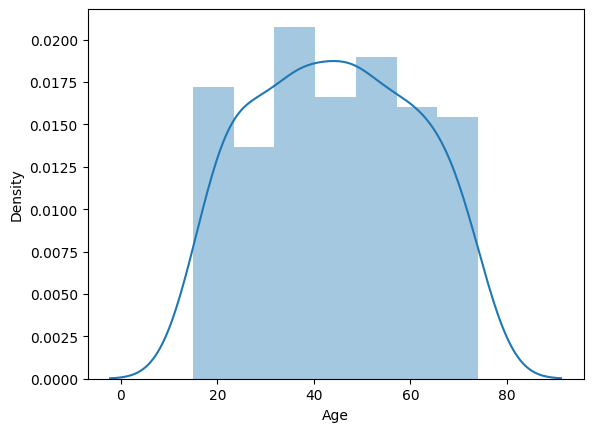

In [13]:
sns.distplot(df.Age)

<Axes: ylabel='Cholesterol'>

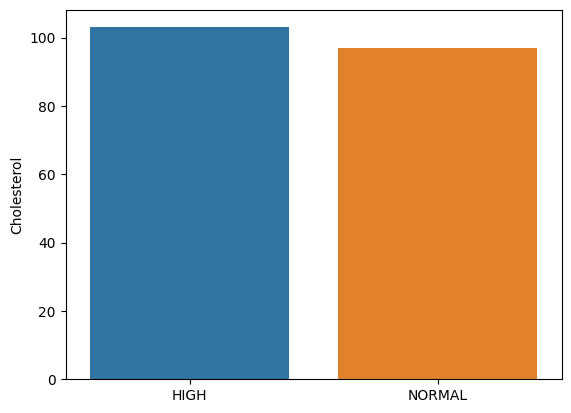

In [17]:
sns.barplot(x = df.Cholesterol.value_counts().index, y = df.Cholesterol.value_counts())

<Axes: xlabel='Age', ylabel='BP'>

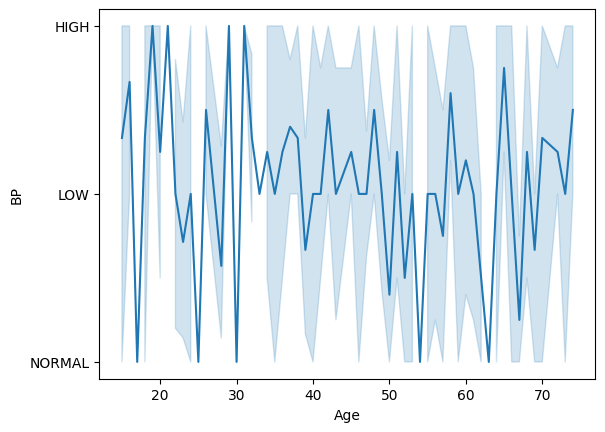

In [19]:
sns.lineplot(x = df.Age, y = df.BP)

<Axes: xlabel='Sex', ylabel='Cholesterol'>

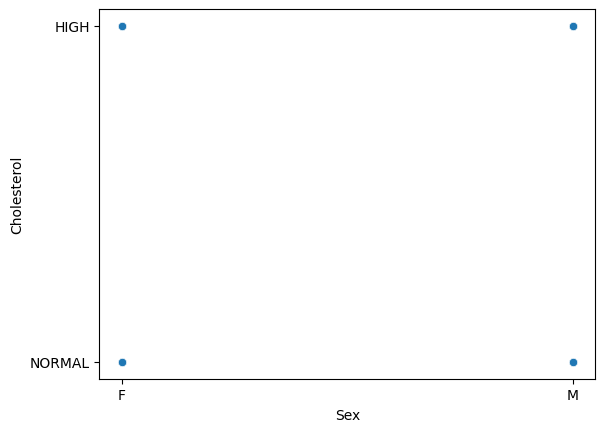

In [20]:
sns.scatterplot(x = df.Sex, y = df.Cholesterol)

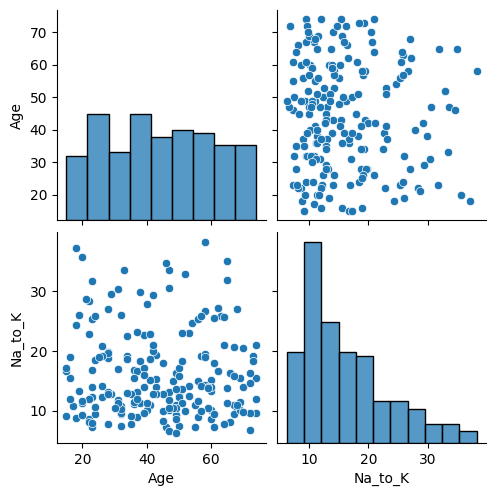

In [21]:
sns.pairplot(df)

<ipython-input-22-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

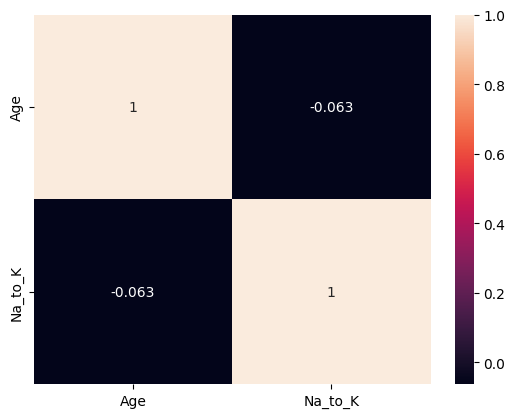

In [22]:
sns.heatmap(df.corr(), annot = True)

# Outlier Detection

Z-Score, Percentile, iqr - removal methods, replacement method - median

<Axes: >

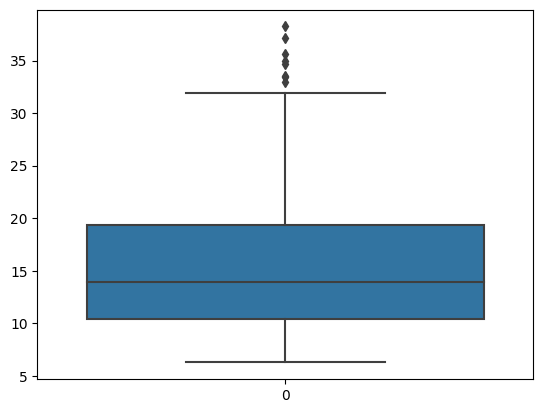

In [24]:
sns.boxplot(df.Na_to_K)

10.4455 
 19.38
IQR =  8.9345
upper limit =  32.78175
lower limit =  -2.9562500000000007


<Axes: >

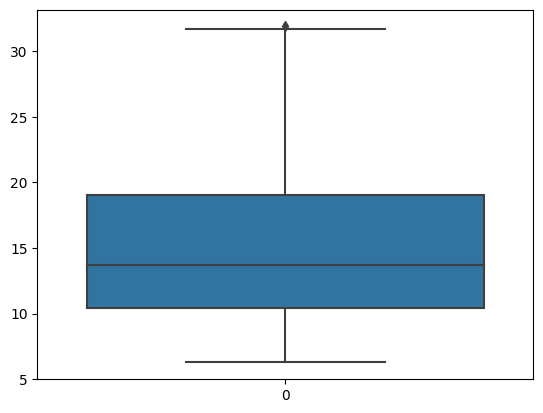

In [25]:
q1 = df.Na_to_K.quantile(0.25)
q3 = df.Na_to_K.quantile(0.75)

print(q1, '\n', q3)

IQR = q3 - q1
print('IQR = ', IQR)

upperLimit = q3 + 1.5*IQR
lowerLimit = q1 - 1.5*IQR

print('upper limit = ', upperLimit)
print('lower limit = ', lowerLimit)

df = df[df.Na_to_K < upperLimit]
sns.boxplot(df.Na_to_K)

### Z-Score

In [ ]:
from scipy import stats

Na_to_K_zscore = stats.zscore(df.Na_to_K)
print(Na_to_K_zscore)



Replacement of Outliers using median

Median =  Age        44.0000
Na_to_K    13.6835
dtype: float64
Dimensions =  (192, 6)


<ipython-input-26-b622cf10013e>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Median = ', df.median())
<ipython-input-26-b622cf10013e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Na_to_K'] = np.where(df['Na_to_K'] > upperLimit, 30, df['Na_to_K'])


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


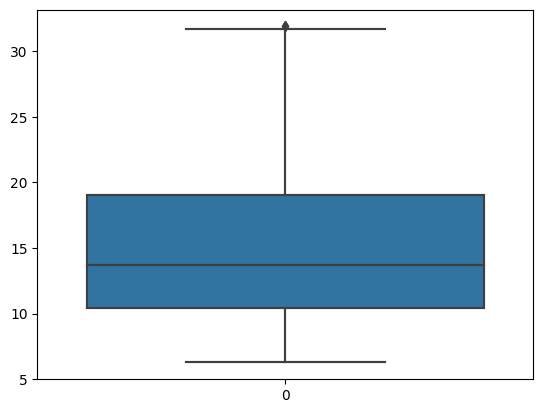

In [26]:
sns.boxplot(df.Na_to_K)

print('Median = ', df.median())

df['Na_to_K'] = np.where(df['Na_to_K'] > upperLimit, 30, df['Na_to_K'])
sns.boxplot(df.Na_to_K)

print('Dimensions = ', df.shape)

df.head()

Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

Performing label encoding for categorical variables.

In [2]:
df = pd.read_csv('drug200.csv')

df.dropna(inplace=True)

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

Splitting the dataset into features and labels, and into training and testing sets.

In [3]:
X = df.drop('Drug', axis=1)
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Performing feature scaling

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Defining the ANN model architecture with the given requirements

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))  # Input layer
model.add(Dense(128, activation='relu'))  # Hidden layer 1
model.add(Dense(64, activation='relu'))  # Hidden layer 2
model.add(Dense(32, activation='relu'))  # Hidden layer 3
model.add(Dense(5, activation='softmax'))  # Output layer with 5 classes

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32)

Epoch 1/20
5/5 [==============================] - 2s 5ms/step - loss: 1.5882 - accuracy: 0.3250
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 1.4713 - accuracy: 0.4875
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 1.3606 - accuracy: 0.5562
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 1.2281 - accuracy: 0.6250
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 1.0710 - accuracy: 0.6500
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.9166 - accuracy: 0.7000
Epoch 7/20
5/5 [==============================] - 0s 6ms/step - loss: 0.7698 - accuracy: 0.7437
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.7688
Epoch 9/20
5/5 [==============================] - 0s 4ms/step - loss: 0.5463 - accuracy: 0.8250
Epoch 10/20
5/5 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.8500
Epoch 11/20
5/5 [======================

Task 3: Test the model with random data

1. Generate random data for testing
2. Make predictions
3. Convert the predictions to class labels
4. Decode the predicted class labels
5. Print the predicted drugs

In [9]:
random_data = np.array([[40, 0, 1, 1, 25], [60, 1, 2, 0, 30]])
random_data_scaled = scaler.transform(random_data)

predictions = model.predict(random_data_scaled)

predicted_classes = np.argmax(predictions, axis=1)

predicted_drugs = le.inverse_transform(predicted_classes)

print("Predicted Drugs:")
for drug in predicted_drugs:
    print(drug)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
Predicted Drugs:
DrugY
DrugY
